In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/'\
                 'raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = ['species']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df[features],
                                                df[target],
                                                test_size = 0.2,
                                                random_state = 0)

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
model.predict(np.array((2,3,4,5)).reshape(1,4))

/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

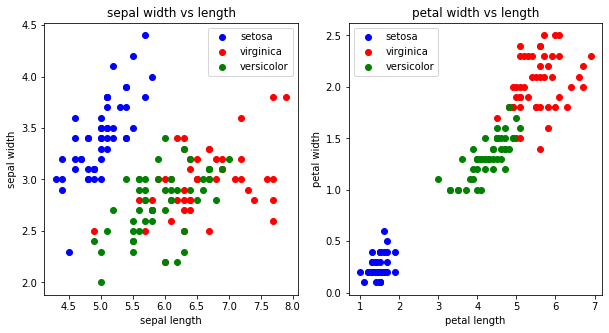

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
# setosa
ax[0].scatter(df[df['species']=='setosa']['sepal_length'],
             df[df['species']=='setosa']['sepal_width'],
             color = 'blue',
             label = 'setosa')
ax[0].set_title('sepal width vs length')
# virginica
ax[0].scatter(df[df['species']=='virginica']['sepal_length'],
             df[df['species']=='virginica']['sepal_width'],
             color = 'red',
             label = 'virginica')
ax[0].set_title('sepal width vs length')
# versicolor
ax[0].scatter(df[df['species']=='versicolor']['sepal_length'],
             df[df['species']=='versicolor']['sepal_width'],
             color = 'green',
             label = 'versicolor')
ax[0].set_title('sepal width vs length')
ax[0].set_xlabel('sepal length')
ax[0].set_ylabel('sepal width')
ax[1].scatter(df[df['species']=='setosa']['petal_length'],
             df[df['species']=='setosa']['petal_width'],
             color = 'blue',
             label = 'setosa')
ax[1].set_title('petal width vs length')
# virginica
ax[1].scatter(df[df['species']=='virginica']['petal_length'],
             df[df['species']=='virginica']['petal_width'],
             color = 'red',
             label = 'virginica')
ax[1].set_title('petal width vs length')
# versicolor
ax[1].scatter(df[df['species']=='versicolor']['petal_length'],
             df[df['species']=='versicolor']['petal_width'],
             color = 'green',
             label = 'versicolor')
ax[1].set_title('petal width vs length')
ax[1].set_xlabel('petal length')
ax[1].set_ylabel('petal width')
ax[1].legend()
ax[0].legend();

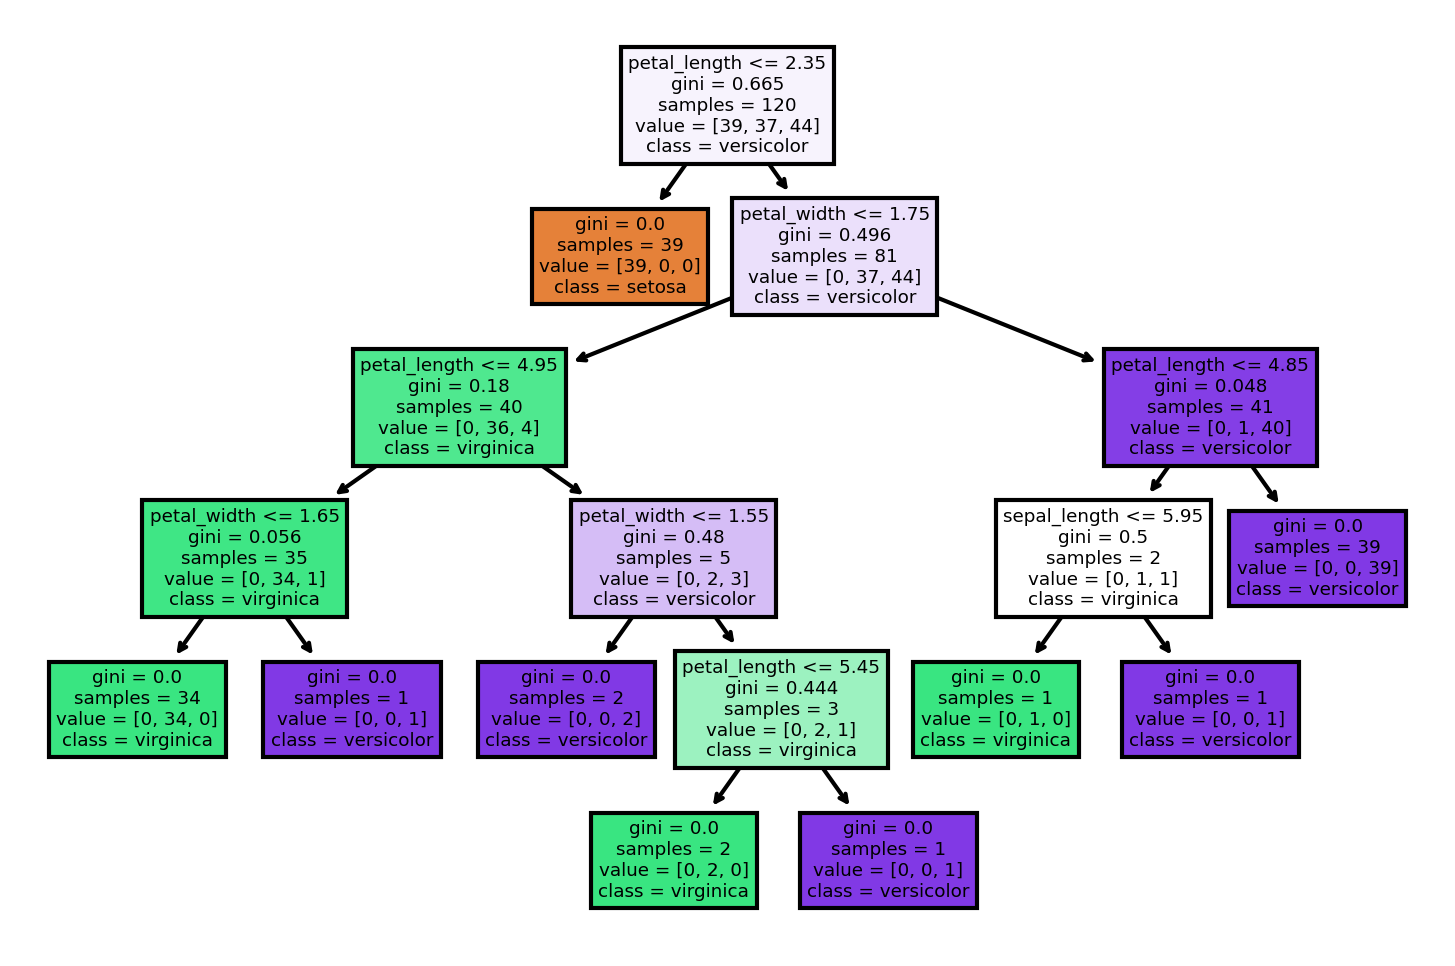

In [16]:
# let's graph the decision tree
from sklearn.tree import plot_tree
fig,ax = plt.subplots(nrows = 1, ncols = 1, dpi = 300)
plot_tree(model,feature_names = features,
         class_names = ['setosa', 'virginica','versicolor'],
         filled = True);

In [15]:
model.predict(np.array((2.5,6,1.5,5)).reshape(1,4))

/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [17]:
df.head(0)

,sepal_length,sepal_width,petal_length,petal_width,species


In [18]:
# check how it performs on the test data
# see predictions for the test data
pred = model.predict(x_test)

In [19]:
model.score(x_test,y_test)

1.0

In [20]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


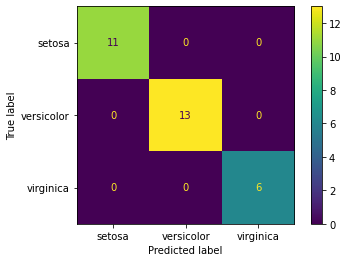

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [21]:
Counter(np.asarray(y_test).reshape(-1,))

Counter({'virginica': 6, 'versicolor': 13, 'setosa': 11})

In [23]:
# load and train more models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
models = {}
models['LR'] = LogisticRegression(solver = 'liblinear', multi_class='ovr')
models['LDA'] = LinearDiscriminantAnalysis()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC(gamma = 'auto')

In [26]:
results = []
# for each model, train it on the training data, then test it on the test data
for model in models.keys():
    models[model].fit(x_train,y_train)
    res = models[model].score(x_test,y_test)
    results.append((model,res))
results

/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/briggsc1-erau.edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

[('LR', 0.9666666666666667),
 ('LDA', 1.0),
 ('CART', 1.0),
 ('NB', 0.9666666666666667),
 ('SVM', 1.0)]

We have three models which were perfect on the test data. The other two were pretty good.

We don't know how they would perform on new data, or more data.

In [27]:
# board work: theory of line of best fit